### Telecom Churn - ML Group Case Study
   * As 80 revenue comes from 20% high value customers, let us Predict churn only on high-value customers
   * Predict usage-based definition to define churn
#### Phases 
   * ‘churn’ phase is where customer is said to have churned 
   * ‘good’ phase the customer is happy 
   * ‘action’ phase  customer experience starts to sore


In [1]:
# Import the required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import libraries
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the input data and preview
df_main= pd.read_csv('telecom_churn_data.csv')
df_main.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
pd.set_option('display.max_columns',250)
print (df_main.shape)
print (df_main.info())
df_main.describe()

(99999, 226)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [4]:
#list of columns
pd.DataFrame(df_main.columns)

,0
0,mobile_number
1,circle_id
2,loc_og_t2o_mou
3,std_og_t2o_mou
4,loc_ic_t2o_mou
...,...
221,aon
222,aug_vbc_3g
223,jul_vbc_3g
224,jun_vbc_3g


### Data Cleaning

***





#### Custome class for repeated work

In [5]:
class Helper:
    @staticmethod
    def findMissingValues(df,cutoff):
        missing = round(100*(df.isnull().sum()/df.shape[0]))
        print("There are {} features having more than {}% missing values/entries".format(len(missing.loc[missing > cutoff]),cutoff))
        return missing.loc[missing > cutoff]
    
    @staticmethod
    def imputeNan(df,imputeColList=False,missingColList=False):
    # Function impute the nan with 0
    # argument: colList, list of columns for which nan is to be replaced with 0
        if imputeColList:
            for col in [y + s for s in ['_6','_7','_8','_9'] for y in imputeColList]:
                df[col].fillna(0, inplace=True)
        else:    
            for col in missingColList:
                df[col].fillna(0, inplace=True)
     
    @staticmethod
    def dropCols(df,cols):
        df.drop(cols,axis=1,inplace=True)
        print(df.shape)
        
    @staticmethod
    def dropMissing(df,cutOff):
        Helper.dropCols(df,Helper.findMissingValues(df,cutOff).index)
    
    @staticmethod
    def getChurnStatus(df):
        churn_cols= ['vol_2g_mb_9','vol_3g_mb_9','total_ic_mou_9','total_og_mou_9']
        flag = ~df[churn_cols].any(axis=1)
        flag = flag.map({True:1, False:0})
        return flag
        

#### Handling missing data

Intentiate Helper to get it working.

In [6]:
help = Helper()

In [7]:
# check feature with more then 40# missing values
help.findMissingValues(df_main,40)

There are 40 features having more than 40% missing values/entries


date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
total_rech_data_6           75.0
total_rech_data_7           74.0
total_rech_data_8           74.0
total_rech_data_9           74.0
max_rech_data_6             75.0
max_rech_data_7             74.0
max_rech_data_8             74.0
max_rech_data_9             74.0
count_rech_2g_6             75.0
count_rech_2g_7             74.0
count_rech_2g_8             74.0
count_rech_2g_9             74.0
count_rech_3g_6             75.0
count_rech_3g_7             74.0
count_rech_3g_8             74.0
count_rech_3g_9             74.0
av_rech_amt_data_6          75.0
av_rech_amt_data_7          74.0
av_rech_amt_data_8          74.0
av_rech_amt_data_9          74.0
arpu_3g_6                   75.0
arpu_3g_7                   74.0
arpu_3g_8                   74.0
arpu_3g_9                   74.0
arpu_2g_6                   75.0
arpu_2g_7                   74.0
arpu_2g_8 

Out the these 40 features, many are required and are essential for analysis. So impute some of the colums needed

In [8]:
# Since av_rech_amt_data_* features are important for getting the high-value customers,
imputeCol = ['av_rech_amt_data', 'arpu_2g', 'arpu_3g', 'count_rech_2g', 'count_rech_3g',
             'max_rech_data', 'total_rech_data','fb_user','night_pck_user']
help.imputeNan(df_main,imputeCol)

In [9]:
help.findMissingValues(df_main,50)

There are 4 features having more than 50% missing values/entries


date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
dtype: float64

In [10]:
# dropping the columns having more than 50% missing values
help.dropMissing(df_main,50)

There are 4 features having more than 50% missing values/entries
(99999, 222)


In [11]:
# Missing values per column expressed as % of total number of values > 5%
help.findMissingValues(df_main,5)

There are 29 features having more than 5% missing values/entries


onnet_mou_9         8.0
offnet_mou_9        8.0
roam_ic_mou_9       8.0
roam_og_mou_9       8.0
loc_og_t2t_mou_9    8.0
loc_og_t2m_mou_9    8.0
loc_og_t2f_mou_9    8.0
loc_og_t2c_mou_9    8.0
loc_og_mou_9        8.0
std_og_t2t_mou_9    8.0
std_og_t2m_mou_9    8.0
std_og_t2f_mou_9    8.0
std_og_t2c_mou_9    8.0
std_og_mou_9        8.0
isd_og_mou_9        8.0
spl_og_mou_9        8.0
og_others_9         8.0
loc_ic_t2t_mou_9    8.0
loc_ic_t2m_mou_9    8.0
loc_ic_t2f_mou_9    8.0
loc_ic_mou_9        8.0
std_ic_t2t_mou_9    8.0
std_ic_t2m_mou_9    8.0
std_ic_t2f_mou_9    8.0
std_ic_t2o_mou_9    8.0
std_ic_mou_9        8.0
spl_ic_mou_9        8.0
isd_ic_mou_9        8.0
ic_others_9         8.0
dtype: float64

In [12]:
# checking if all these above features go missing together since they have the same 8% missing values in each feature.
missingcol = list(help.findMissingValues(df_main,5).index)
print ("There are %d customers/MSISDN's having missing values for %s together"%(len(df_main[df_main[missingcol].isnull().all(axis=1)]),missingcol))
df_main[df_main[missingcol].isnull().all(axis=1)][missingcol].head()

There are 29 features having more than 5% missing values/entries
There are 7745 customers/MSISDN's having missing values for ['onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9'] together


,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,std_og_t2m_mou_9,std_og_t2f_mou_9,std_og_t2c_mou_9,std_og_mou_9,isd_og_mou_9,spl_og_mou_9,og_others_9,loc_ic_t2t_mou_9,loc_ic_t2m_mou_9,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Yes, It looks like for 7745 Customers all these features are empty together without any value. We can choose to impute these values with 0 also.

In [13]:
help.imputeNan(df_main,missingColList=missingcol)

In [14]:
df_main=df_main[~df_main[missingcol].isnull().all(axis=1)]
df_main.shape

(99999, 222)

In [15]:
# Missing values per column expressed as 2% of total number of values
missingCols = list(help.findMissingValues(df_main,2).index)

There are 89 features having more than 2% missing values/entries


In [16]:
print ("There are %d customers/MSISDN's having missing values for %s together"%(len(df_main[df_main[missingCols].isnull().all(axis=1)]),missingCols))
df_main[df_main[missingCols].isnull().all(axis=1)][missingCols].head()

There are 381 customers/MSISDN's having missing values for ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,date_of_last_rech_8,date_of_last_rech_9
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Yes, It looks like there are 381 Customers for whom all these features are without any value. Let's drop these customers from the data.

In [17]:
df_main=df_main[~df_main[missingCols].isnull().all(axis=1)]
df_main.shape

(99618, 222)

In [18]:
# For other customers where these missing values are spread out, let's impute them with zero. 

missingCols.remove('date_of_last_rech_8')
missingCols.remove('date_of_last_rech_9')
help.imputeNan(df_main,missingColList=missingCols)

In [19]:
# Missing values per column expressed as % of total number of values
help.findMissingValues(df_main,0)

There are 9 features having more than 0% missing values/entries


loc_og_t2o_mou          1.0
std_og_t2o_mou          1.0
loc_ic_t2o_mou          1.0
last_date_of_month_8    1.0
last_date_of_month_9    1.0
date_of_last_rech_6     1.0
date_of_last_rech_7     1.0
date_of_last_rech_8     3.0
date_of_last_rech_9     4.0
dtype: float64

In [20]:
col = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']
for c in col: 
    print("Unique values in column %s are %s" % (c,df_main[c].unique()))

Unique values in column loc_og_t2o_mou are [ 0. nan]
Unique values in column std_og_t2o_mou are [ 0. nan]
Unique values in column loc_ic_t2o_mou are [ 0. nan]
Unique values in column last_date_of_month_7 are ['7/31/2014' nan]
Unique values in column last_date_of_month_8 are ['8/31/2014' nan]
Unique values in column last_date_of_month_9 are ['9/30/2014' nan]
Unique values in column date_of_last_rech_7 are ['7/16/2014' '7/31/2014' '7/24/2014' '7/28/2014' '7/17/2014' '7/25/2014'
 '7/23/2014' '7/5/2014' '7/10/2014' '7/22/2014' '7/30/2014' '7/3/2014'
 '7/7/2014' '7/29/2014' '7/27/2014' '7/19/2014' '7/14/2014' '7/20/2014'
 '7/4/2014' '7/12/2014' nan '7/26/2014' '7/11/2014' '7/6/2014' '7/21/2014'
 '7/13/2014' '7/15/2014' '7/18/2014' '7/9/2014' '7/2/2014' '7/8/2014'
 '7/1/2014']
Unique values in column date_of_last_rech_8 are ['8/8/2014' '8/28/2014' '8/14/2014' '8/31/2014' '8/9/2014' '8/24/2014'
 '8/26/2014' '8/30/2014' '8/29/2014' '8/27/2014' '8/21/2014' '8/10/2014'
 '8/25/2014' '8/19/2014' '

In [21]:
#Some of these features take only one value. Lets impute their missing values in these features with the mode
col = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9']
for c in col:
    print(df_main[c].value_counts())
    df_main[c].fillna(df_main[c].mode()[0], inplace=True)
print("All the above features take only one value. Lets impute the missing values in these features with the mode")

0.0    98981
Name: loc_og_t2o_mou, dtype: int64
0.0    98981
Name: std_og_t2o_mou, dtype: int64
0.0    98981
Name: loc_ic_t2o_mou, dtype: int64
7/31/2014    99300
Name: last_date_of_month_7, dtype: int64
8/31/2014    98867
Name: last_date_of_month_8, dtype: int64
9/30/2014    98321
Name: last_date_of_month_9, dtype: int64
All the above features take only one value. Lets impute the missing values in these features with the mode


In [22]:
# Missing values per column expressed as % of total number of values
help.findMissingValues(df_main,0)


There are 4 features having more than 0% missing values/entries


date_of_last_rech_6    1.0
date_of_last_rech_7    1.0
date_of_last_rech_8    3.0
date_of_last_rech_9    4.0
dtype: float64

In [23]:
# All these features are missing together
missingcol = list(help.findMissingValues(df_main,0).index)
print ("There are %d rows in total having missing values for these variables."%(len(df_main[df_main[missingcol].isnull().all(axis=1)])))

There are 4 features having more than 0% missing values/entries
There are 22 rows in total having missing values for these variables.


In [24]:
df_main[df_main['date_of_last_rech_6'].isnull()]['date_of_last_rech_6'] = '6/30/2014'
df_main[df_main['date_of_last_rech_7'].isnull()]['date_of_last_rech_7'] = '7/31/2014'
df_main[df_main['date_of_last_rech_8'].isnull()]['date_of_last_rech_8'] = '8/31/2014'
df_main[df_main['date_of_last_rech_9'].isnull()]['date_of_last_rech_9'] = '9/30/2014'

Let's look for columns having all values as 0.

In [25]:
zero_columns=df_main.columns[(df_main == 0).all()]
print ("There are {} features which has only 0 as values. These features are \n{}".format(len(zero_columns),zero_columns))

There are 11 features which has only 0 as values. These features are 
Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')


In [26]:
# Let's remove these columns as well. All take a single value '0'.
help.dropCols(df_main,zero_columns)


(99618, 211)


In [27]:
# Percentage of data left after removing the missing values.
print("Percentage of data remaining after treating missing values: {}%".format(round(df_main.shape[0]/99999 *100,2)))
print ("Number of customers: {}".format(df_main.shape[0]))
print ("Number of features: {}".format(df_main.shape[1]))

Percentage of data remaining after treating missing values: 99.62%
Number of customers: 99618
Number of features: 211


### Fixing  columns names and data types 
***
##### Let's check for data types of the different columns.

In [28]:
df_main.reset_index(inplace=True,drop=True)
# list of all columns which store date
date_columns = list(df_main.filter(regex='date').columns)
date_columns


['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [29]:
# Converting dtype of date columns to datetime
for col in date_columns:
    df_main[col] = pd.to_datetime(df_main[col], format='%m/%d/%Y')

In [30]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99618 entries, 0 to 99617
Columns: 211 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](8), float64(168), int64(35)
memory usage: 160.4 MB


Let us change monthly features which are not in the standard naming (_6,_7,_8,_9)

In [31]:
# renaming columns,
#'jun_vbc_3g' : 'vbc_3g_6'
#'jul_vbc_3g' : 'vbc_3g_7'
#'aug_vbc_3g' : 'vbc_3g_8'
#'sep_vbc_3g' : 'vbc_3g_9'
df_main.rename(columns={'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8',
                      'sep_vbc_3g' : 'vbc_3g_9'}, inplace=True)

Add new feature: 'vol_data_mb_6', 'vol_data_mb_7', 'vol_data_mb_8', 'vol_data_mb_9'to store the total data volume (= vol_2gmb + vol_3gmb) used by user.

In [32]:
#Adding new feature: 'vol_data_mb_6', 'vol_data_mb_7', 'vol_data_mb_8', 'vol_data_mb_9',
for i in range(6,10):
    df_main['vol_data_mb_'+str(i)] = (df_main['vol_2g_mb_'+str(i)]+df_main['vol_3g_mb_'+str(i)]).astype(int)

### Filter high-value customers
***

High-value customers are:

Those who have recharged with an amount more than 70 percentile of average recharge in good phase

In [33]:
rechcol = df_main.filter(regex=('count')).columns
df_main[rechcol].head()

,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9
0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


 **Drive new feature** : avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,avg_rech_amt_9

These will store the average recharge value for each customer for every month

In [34]:
# Creating new feature: avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,avg_rech_amt_9
for i in range(6,10):
    df_main['avg_rech_amt_'+str(i)] = round(df_main['total_rech_amt_'+str(i)]/df_main['total_rech_num_'+str(i)]+1,2)

In [35]:
help.imputeNan(df_main,missingColList=['avg_rech_amt_6','avg_rech_amt_7','avg_rech_amt_8','avg_rech_amt_9'])

**Drive new feature**: total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_num_data_9

These will store the total number of data recharge (=count_rech_2g + count_rech_3g ) for each month.

In [36]:
#Creating new feature: total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_num_data_9
for i in range(6,10):
    df_main['total_rech_num_data_'+str(i)] = (df_main['count_rech_2g_'+str(i)]+df_main['count_rech_3g_'+str(i)]).astype(int)

**Creating new feature**: total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9

These will store the total amount of data recharge (=total_rech_num_data * av_rech_amt_data ) for each month.

In [37]:
#Creating new feature: total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9
for i in range(6,10):
    df_main['total_rech_amt_data_'+str(i)] = df_main['total_rech_num_data_'+str(i)]*df_main['av_rech_amt_data_'+str(i)]

**Drive new feature**: total_month_rech_6,total_month_rech_7,total_month_rech_8,total_month_rech_9

These will store the total recharge amount (= total_rech_amt + total_rech_amt_data ) for each customer, for each month.

In [38]:
#Creating new feature: total_mon_rech_6,total_mon_rech_7,total_mon_rech_8,total_mon_rech_9
for i in range(6,10):
    df_main['total_month_rech_'+str(i)] = df_main['total_rech_amt_'+str(i)]+df_main['total_rech_amt_data_'+str(i)]
df_main.filter(regex=('total_month_rech')).head()

,total_month_rech_6,total_month_rech_7,total_month_rech_8,total_month_rech_9
0,614.0,504.0,504.0,0.0
1,74.0,538.0,383.0,121.0
2,168.0,315.0,116.0,404.0
3,230.0,310.0,601.0,410.0
4,252.0,350.0,287.0,200.0


In [39]:
# calculating the avegare of first two months (good phase) total monthly recharge amount
avg_goodPhase =(df_main.total_month_rech_6 + df_main.total_month_rech_7)/2
# finding the cutoff which is the 70th percentile of the good phase average recharge amounts
hv_cutoff= np.percentile(avg_goodPhase,70)
# Filtering the users whose good phase avg. recharge amount >= to the cutoff of 70th percentile.
hv_users = df_main[avg_goodPhase >=  hv_cutoff]
hv_users.reset_index(inplace=True,drop=True)

print("Number of High-Value Customers in the Dataset: %d\n"% len(hv_users))
print("Percentage High-value users in data : {}%".format(round(len(hv_users)/df_main.shape[0]*100),2))

Number of High-Value Customers in the Dataset: 29906

Percentage High-value users in data : 30%


**Tagging Churners**

Let us tag churned customers (churn=1, else 0) 

Using 
* total_ic_mou_9
* total_og_mou_9
* vol_2g_mb_9
* vol_3g_mb_9

columns(Curn phase data) find users who have churned based on balls and data is not used

In [40]:
def getChurnStatus(data,churnPhaseMonth=9):
    # Function to tag customers as churners (churn=1, else 0) based on 'vol_2g_mb_','vol_3g_mb_','total_ic_mou_','total_og_mou_'
    #argument: churnPhaseMonth, indicating the month number to be used to define churn (default= 9)
    churn_features= ['vol_2g_mb_','vol_3g_mb_','total_ic_mou_','total_og_mou_']
    flag = ~data[[s + str(churnPhaseMonth) for s in churn_features ]].any(axis=1)
    flag = flag.map({True:1, False:0})
    return flag

In [41]:
hv_users['churn'] = help.getChurnStatus(hv_users)
print("There are {} users tagged as churners out of {} High-Value Customers.".format(len(hv_users[hv_users.churn == 1]),hv_users.shape[0]))
print("High-value Churn Percentage : {}%".format(round(len(hv_users[hv_users.churn == 1])/hv_users.shape[0] *100,2)))

There are 2418 users tagged as churners out of 29906 High-Value Customers.
High-value Churn Percentage : 8.09%


There are just **8.09%** churn cases.

Thisis highly **imbalanced** data set where the churn cases are the minority(8.14%) as opposed to the non-churners who are the majority(91.91)



### Data Analysis
***

plotting graphs Methods

In [42]:
class Plotter:
    @staticmethod
    def hist(df,col,binsize):
        fig, ax = plt.subplots(figsize=(20,4))
        counts, bins, patches = ax.hist(df[col],bins=range(0,df[col].max(),round(binsize)), facecolor='orange', edgecolor='gray')

        # Set the ticks to be at the edges of the bins.
        ax.set_xticks(bins)
        bin_centers = 0.5 * np.diff(bins) + bins[:-1]
        for count, x in zip(counts, bin_centers):
            # Label the percentages
            percent = '%0.0f%%' % (100 * float(count) / counts.sum())
            ax.annotate(percent, xy=(x,0.2), xycoords=('data', 'axes fraction'),
            xytext=(0, -32), textcoords='offset points', va='top', ha='center')

        ax.set_xlabel(col.upper())
        ax.set_ylabel('Count')
        # Give ourselves some more room at the bottom of the plot
        #plt.subplots_adjust(bottom=0.15)
        plt.show()
    
    @staticmethod
    def avgMonthlyCalls(pltType,data,calltype,colList):
        # style
        plt.style.use('seaborn-darkgrid')
        # create a color palette
        palette = plt.get_cmap('Set1')

        if pltType == 'multi':
            #Create dataframe after grouping on AON with colList features
            total_call_mou = pd.DataFrame(data.groupby('aon_bin',as_index=False)[colList].mean())
            total_call_mou['aon_bin']=pd.to_numeric(total_call_mou['aon_bin'])
            total_call_mou
            # multiple line plot
            num=0
            fig, ax = plt.subplots(figsize=(15,8))
            for column in total_call_mou.drop('aon_bin', axis=1):
                num+=1
                ax.plot(total_call_mou['aon_bin'] , total_call_mou[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)

            ## Add legend
            plt.legend(loc=2, ncol=2)
            ax.set_xticks(total_call_mou['aon_bin'])

            # Add titles
            plt.title("Avg.Monthly "+calltype+" MOU  V/S AON", loc='left', fontsize=12, fontweight=0, color='green')
            plt.xlabel("Aon (years)")
            plt.ylabel("Avg. Monthly "+calltype+" MOU")
        elif pltType == 'single':
            fig, ax = plt.subplots(figsize=(8,4))
            ax.plot(data[colList].mean())
            ax.set_xticklabels(['Jun','Jul','Aug','Sep'])

            # Add titles
            plt.title("Avg. "+calltype+" MOU  V/S Month", loc='left', fontsize=12, fontweight=0, color='green')
            plt.xlabel("Month")
            plt.ylabel("Avg. "+calltype+" MOU")

        plt.show()
        
    @staticmethod    
    def byChurnMou(data,colList,calltype):
        fig, ax = plt.subplots(figsize=(7,4))
        df=data.groupby(['churn'])[colList].mean().T
        plt.plot(df)
        ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
        ## Add legend
        plt.legend(['Non-Churn', 'Churn'])
        # Add titles
        plt.title("Avg. "+calltype+" MOU  V/S Month", loc='left', fontsize=12, fontweight=0, color='green')
        plt.xlabel("Month")
        plt.ylabel("Avg. "+calltype+" MOU")
        
    @staticmethod
    def byChurn(data,col):
        # per month churn vs Non-Churn
        fig, ax = plt.subplots(figsize=(7,4))
        colList=list(data.filter(regex=(col)).columns)
        colList = colList[:3]
        plt.plot(hv_users.groupby('churn')[colList].mean().T)
        ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
        ## Add legend
        plt.legend(['Non-Churn', 'Churn'])
        # Add titles
        plt.title( str(col) +" V/S Month", loc='left', fontsize=12, fontweight=0, color='green')
        plt.xlabel("Month")
        plt.ylabel(col)
        plt.show()
        # Numeric stats for per month churn vs Non-Churn
        return hv_users.groupby('churn')[colList].mean()

In [43]:
# Filtering the common monthly columns for each month
comcol = hv_users.filter(regex ='_6').columns
monthlycol = [item.strip('_6') for item in comcol]
monthlycol

['last_date_of_month',
 'arpu',
 'onnet_mou',
 'offnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'loc_og_t2t_mou',
 'loc_og_t2m_mou',
 'loc_og_t2f_mou',
 'loc_og_t2c_mou',
 'loc_og_mou',
 'std_og_t2t_mou',
 'std_og_t2m_mou',
 'std_og_t2f_mou',
 'std_og_mou',
 'isd_og_mou',
 'spl_og_mou',
 'og_others',
 'total_og_mou',
 'loc_ic_t2t_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2f_mou',
 'loc_ic_mou',
 'std_ic_t2t_mou',
 'std_ic_t2m_mou',
 'std_ic_t2f_mou',
 'std_ic_mou',
 'total_ic_mou',
 'spl_ic_mou',
 'isd_ic_mou',
 'ic_others',
 'total_rech_num',
 'total_rech_amt',
 'max_rech_amt',
 'date_of_last_rech',
 'last_day_rch_amt',
 'total_rech_data',
 'max_rech_data',
 'count_rech_2g',
 'count_rech_3g',
 'av_rech_amt_data',
 'vol_2g_mb',
 'vol_3g_mb',
 'arpu_3g',
 'arpu_2g',
 'night_pck_user',
 'monthly_2g',
 'sachet_2g',
 'monthly_3g',
 'sachet_3g',
 'fb_user',
 'vbc_3g',
 'vol_data_mb',
 'avg_rech_amt',
 'total_rech_num_data',
 'total_rech_amt_data',
 'total_month_rech']

In [44]:
# Lets remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).
col_9List = hv_users.filter(regex=('_9')).columns
hv_users.drop(col_9List,axis=1,inplace=True)

In [45]:
# list of all the monthly columns 6,7,8
allmonthlycol = [x + s for s in ['_6','_7','_8'] for x in monthlycol]
allmonthlycol

['last_date_of_month_6',
 'arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'date_of_last_rech_6',
 'last_day_rch_amt_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'fb_user_6',
 'vbc_3g_6',
 'vol_data_mb_6',
 'avg_rech_

In [46]:
# list of column which are not monthly columns
nonmonthlycol = [col for col in hv_users.columns if col not in allmonthlycol]
nonmonthlycol

['mobile_number', 'circle_id', 'aon', 'churn']

#### Check AON ( age on network column)

count    29906.000000
mean      1209.062396
std        957.342718
min        180.000000
25%        460.000000
50%        846.000000
75%       1755.000000
max       4321.000000
Name: aon, dtype: float64


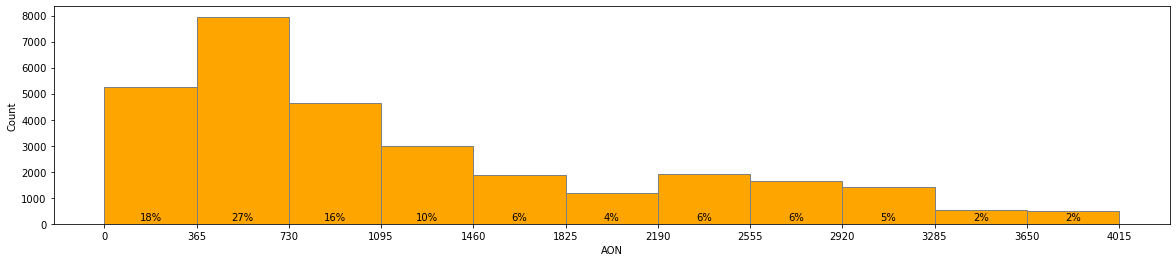

In [47]:
# Customers distribution of the age on network
print(hv_users.aon.describe())
Plotter.hist(hv_users,'aon',365)

#### Observations 
* Minimun aon is 180 days.
* Average aon for customers is 1200 days (3.2 years).
* 27% of the high value  users are in their 2nd year with the network.
* Almost 71% users have less than 4 years aon.
* 15% users are with 7 years aon .

In [48]:
#Create Derived categorical variable
hv_users['aon_bin'] = pd.cut(df_main['aon'], range(0,df_main['aon'].max(),365), labels=range(0,int(round(df_main['aon'].max()/365))-1))

#### Incoming VS month VS AON

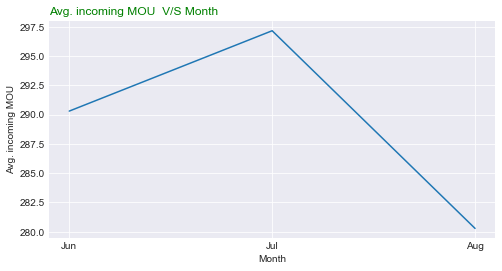

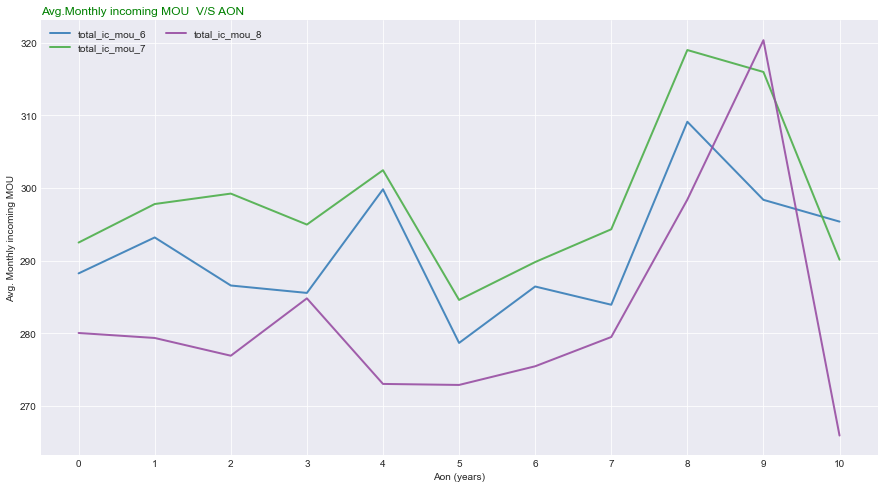

In [49]:
# Plotting Avg. total monthly incoming MOU vs AON
ic_col = hv_users.filter(regex ='total_ic_mou').columns
Plotter.avgMonthlyCalls('single',hv_users,calltype='incoming',colList=ic_col)
Plotter.avgMonthlyCalls('multi',hv_users,calltype='incoming',colList=ic_col)

Following are evident from the plot,

* The more a customer stays on with the operator(AON), more are the total monthly incoming MOU.
* Total Incoming MOU avg. for Jul(_7) are more than the previous Jun(_6) for customers in all AON bands.
* Total Incoming MOU avg. for Aug(_8) cease to increace, infact it shows a decline compared to Jul(_7).
* Total Incoming MOU avg. for Sep(_9) is well below the first months(jun _6) avg.
* Althought the Total incoming mou avg inceases from jun to july, it drop little from aug and reduces lower than that for jun.




#### Outgoing VS month VS AON

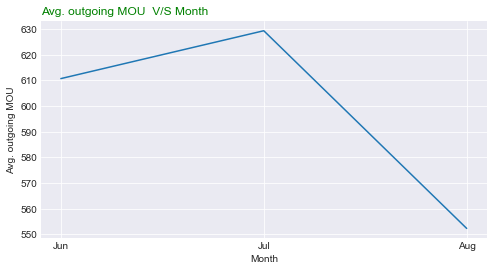

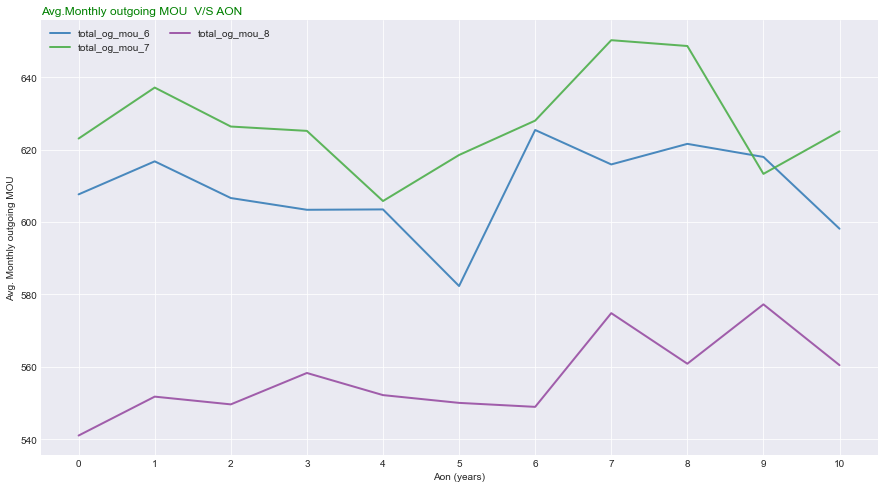

In [50]:

# Plotting Avg. total monthly outgoing MOU vs AON
og_col = hv_users.filter(regex ='total_og_mou').columns
Plotter.avgMonthlyCalls('single',hv_users,calltype='outgoing',colList=og_col)
Plotter.avgMonthlyCalls('multi',hv_users,calltype='outgoing',colList=og_col)

#### Observations --


* Total outgoing MOU avg. for Sep(_9) is the lowest of all 4 months.
* The Avg. outgoing usage reduces drastically for customers in the AON band between 7 - 8 years.
* Overall, the Avg. total outgoing usage reduces with the increasing age on network.
* Total Outgoing MOU avg. for Jul(_7) are more than the previous Jun(_6) for customers in all AON bands, except in the * AON band between 7 - 8 years where it is almost simillar.
* Total outgoing MOU avg. for Aug(_8) cease to increace, infact it shows a significant decline compared to Jul(_7).


### Incoming/Outgoing MOU VS Churn

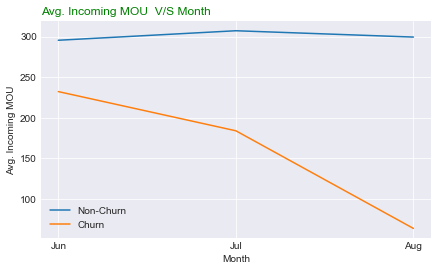

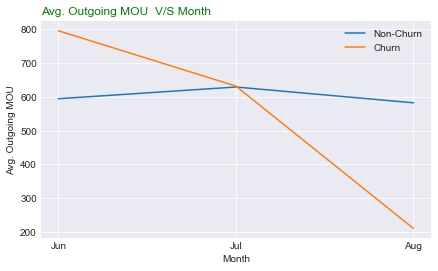

In [51]:
ic_col = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
og_col = ['total_og_mou_6','total_og_mou_7','total_og_mou_8']
Plotter.byChurnMou(hv_users,ic_col,'Incoming')
Plotter.byChurnMou(hv_users,og_col,'Outgoing')

#### Observations 

* Churners Avg. Incoming/Outgoing MOU's drops after the 2nd month,Jul.
* While the non-churners Avg. MOU's remains consistant and stable with each month.
* Therefore, users MOU is a key feature to predict churn.

#### Let's also see this trend in terms of actual numbers.

In [52]:
# Avg.Incoming MOU per month churn vs Non-Churn
hv_users.groupby(['churn'])['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8'].mean()

,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
churn,,,
0,295.401726,307.108317,299.319664
1,232.221162,183.978888,63.813168


In [53]:
# Avg. Outgoing MOU per month churn vs Non-Churn
hv_users.groupby(['churn'])['total_og_mou_6','total_og_mou_7','total_og_mou_8'].mean()

,total_og_mou_6,total_og_mou_7,total_og_mou_8
churn,,,
0,594.414582,629.096568,582.380539
1,795.591038,631.859433,210.659326


**Create new feature**: og_to_ic_mou_6, og_to_ic_mou_7, og_to_ic_mou_8 

These features will hold the ratio (=total_ogmou / total_icmou) for each month. These features will combine both incoming and outgoing informations and should be a better predictor of churn.

In [54]:
#Creating new feature: og_to_ic_mou_6, og_to_ic_mou_7, og_to_ic_mou_8
# adding 1 to denominator to avoid dividing by 0 and getting nan values.
for i in range(6,9):
    hv_users['og_to_ic_mou_'+str(i)] = (hv_users['total_og_mou_'+str(i)])/(hv_users['total_ic_mou_'+str(i)]+1)

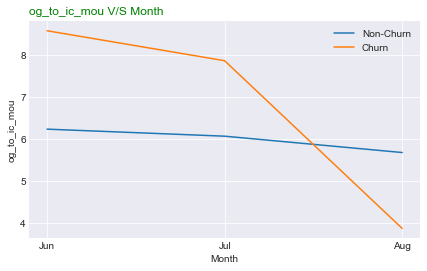

,og_to_ic_mou_6,og_to_ic_mou_7,og_to_ic_mou_8
churn,,,
0,6.235602,6.067952,5.678424
1,8.580257,7.865938,3.870145


In [55]:
Plotter.byChurn(hv_users,'og_to_ic_mou')

#### Observations
* Outgoing is dropping significantly for churners from month Jul(6) to Aug(7).
* consistent for the non-churners.

**Create new feature**: loc_og_to_ic_mou_6, loc_og_to_ic_mou_7, loc_og_to_ic_mou_8 These features will hold the ratio (=loc_ogmou / loc_icmou) for each month. These features will combine the local calls, both incoming and outgoing informations which should be better predictor of churn.

In [56]:

# adding 1 to denominator to avoid dividing by 0 and getting nan values.
for i in range(6,9):
    hv_users['loc_og_to_ic_mou_'+str(i)] = (hv_users['loc_og_mou_'+str(i)])/(hv_users['loc_ic_mou_'+str(i)]+1)

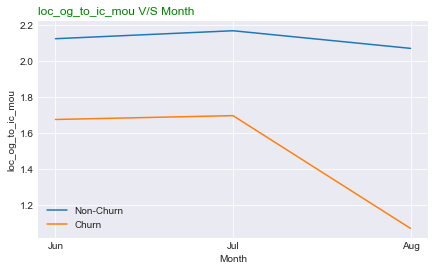

,loc_og_to_ic_mou_6,loc_og_to_ic_mou_7,loc_og_to_ic_mou_8
churn,,,
0,2.124471,2.168763,2.070806
1,1.675413,1.696809,1.069765


In [57]:

Plotter.byChurn(hv_users,'loc_og_to_ic_mou')

#### Obserations

* The local outgoing to incoming call mou ratio is genrally low for churners right from the begining of the good phase.
* local mou pattern for the non-churners remains almost constant through out the 3 months.
* The churners genrally show a low loc mou ratio but it drops dramatically after the 2nd month.
* This might suggest that people who are not making/reciving much local calls during their tenure are more likely to churn.




#### Total data volume VS Churn

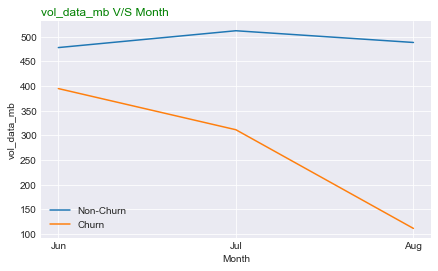

,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8
churn,,,
0,478.037762,512.164072,488.389661
1,394.949545,311.507444,111.469396


In [58]:
Plotter.byChurn(hv_users,'vol_data_mb')

#### Observation
* For churners Data usage drops in good phase.


#### Total monthly rech VS Churn


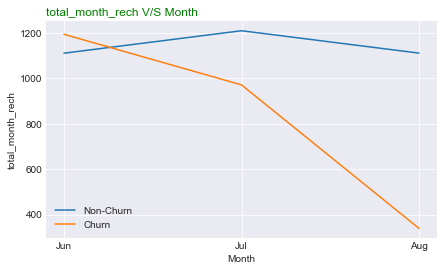

,total_month_rech_6,total_month_rech_7,total_month_rech_8
churn,,,
0,1111.439977,1210.362853,1111.756912
1,1194.747593,971.802758,339.278974


In [59]:
Plotter.byChurn(hv_users,'total_month_rech')

# Observation 
* Total monthly recharge also drops for churners in good phase.


#### ARPU vs Churn

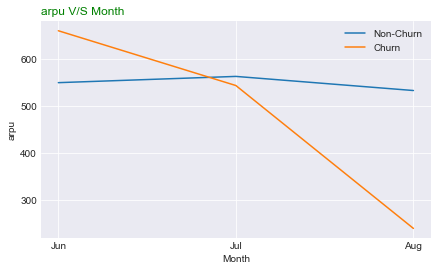

,arpu_6,arpu_7,arpu_8
churn,,,
0,549.843524,563.190828,533.052496
1,660.695411,543.722952,238.631887


In [60]:

Plotter.byChurn(hv_users,'arpu')

#### Observation
* arpu(Average revenue per user) drops significantly for churners

In [61]:
#Create new feature: Total_loc_mou_6,Total_loc_mou_7,lTotal_loc_mou_8
for i in range(6,9):
    hv_users['Total_loc_mou_'+str(i)] = (hv_users['loc_og_mou_'+str(i)])+(hv_users['loc_ic_mou_'+str(i)])

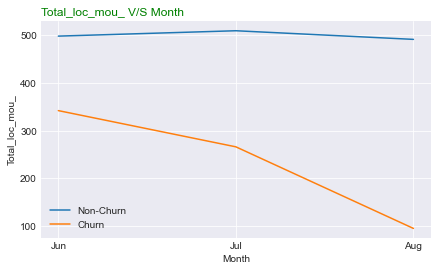

,Total_loc_mou_6,Total_loc_mou_7,Total_loc_mou_8
churn,,,
0,498.548969,509.835211,491.705600
1,342.113462,266.025666,94.701154


In [62]:
Plotter.byChurn(hv_users,'Total_loc_mou_')

#### Observations

* local call mou is genrally low for churners.
* The churners genrally show a low total loc mou which drops dramatically after the 2nd month.
* People who are not making/reciving much local calls during their tenure are more likely to churn.

**Create new feature**: Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
These features will hold the Total roaming MOU (=roam_ic_mou+roam_og_mou) for each month

In [63]:
for i in range(6,9):
    hv_users['Total_roam_mou_'+str(i)] = (hv_users['roam_ic_mou_'+str(i)])+(hv_users['roam_og_mou_'+str(i)])

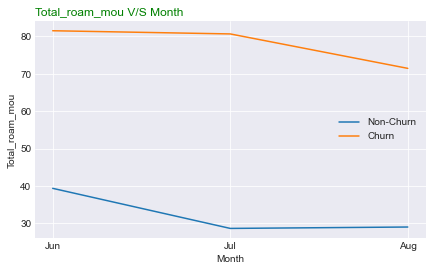

,Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
churn,,,
0,39.360033,28.643301,29.016734
1,81.504156,80.651973,71.443623


In [64]:
Plotter.byChurn(hv_users,'Total_roam_mou')

#### Observations

* Roming usages drops during 

* Surprisingly, the roaming usage of churners is way higher than those of non-churners across all months Which indicate and network roaming rates are higher which may be on of the reason


#### Last_day_rch_amt VS Churn


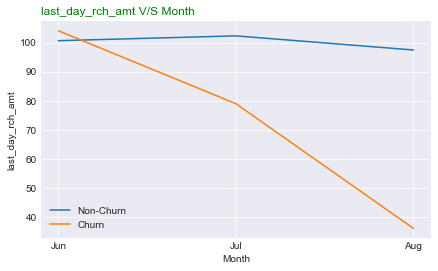

,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8
churn,,,
0,100.657232,102.318284,97.451724
1,104.085194,78.956989,35.955749


In [65]:
Plotter.byChurn(hv_users,'last_day_rch_amt')

#### Observations

* Recharge amount reduces for customer its chances to churn increases.


### Modeling

In [66]:
import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [67]:
class Model:
    
    @staticmethod
    def roc( actual, probs ):
        fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
        auc_score = metrics.roc_auc_score( actual, probs )
        plt.figure(figsize=(6, 6))
        plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('FPR  or [1 - TNR]')
        plt.ylabel('TPR')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()

        return fpr, tpr, thresholds
    @staticmethod
    def metrics(actual_churn=False,pred_churn=False):

        confusion = metrics.confusion_matrix(actual_churn, pred_churn)
        TP = confusion[1,1] # true positive 
        TN = confusion[0,0] # true negatives
        FP = confusion[0,1] # false positives
        FN = confusion[1,0] # false negatives
        print("Roc_auc_score : {}".format(metrics.roc_auc_score(actual_churn,pred_churn)))
        # Let's see the sensitivity of our logistic regression model
        print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
        # Let us calculate specificity
        print('Specificity: {}'.format(TN / float(TN+FP)))
        # Calculate false postive rate - predicting churn when customer does not have churned
        print('FPR: {}'.format(FP/ float(TN+FP)))
        # positive predictive value 
        print('Positive predictive value: {}'.format(TP / float(TP+FP)))
        # Negative predictive value
        print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
        # sklearn precision score value 
        print('sklearn precision score value: {}'.format(metrics.precision_score(actual_churn, pred_churn )))
        
    def predictChurnProb(model,X,y,prob  = 0.5):
        # Funtion to predict the churn using the input probability cut-off
        # Input arguments: model instance, x and y to predict using model and cut-off probability

        # predict
        pred_probs = model.predict_proba(X)[:,1]

        y_df= pd.DataFrame({'churn':y, 'churn_Prob':pred_probs})
        # Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
        y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > prob else 0)
        # Let's see the head
        Model.metrics(y_df.churn,y_df.final_predicted)
        return y_df
    @staticmethod
    def findOptimalCutoff(df):
        #Function to find the optimal cutoff for classifing as churn/non-churn
        # Let's create columns with different probability cutoffs 
        numbers = [float(x)/10 for x in range(10)]
        for i in numbers:
            df[i] = df.churn_Prob.map( lambda x: 1 if x > i else 0)
        #print(df.head())

        # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
        cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
        from sklearn.metrics import confusion_matrix

        # TP = confusion[1,1] # true positive 
        # TN = confusion[0,0] # true negatives
        # FP = confusion[0,1] # false positives
        # FN = confusion[1,0] # false negatives

        num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
        for i in num:
            cm1 = metrics.confusion_matrix(df.churn, df[i] )
            total1=sum(sum(cm1))
            accuracy = (cm1[0,0]+cm1[1,1])/total1

            speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
            sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
            cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
        print(cutoff_df)
         # Let's plot accuracy sensitivity and specificity for various probabilities.
        cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
        plt.show()
    @staticmethod
    def fit(alg, X_train, y_train, performCV=True, cv_folds=5):
        #Fit the algorithm on the data
        alg.fit(X_train, y_train)

        #Predict training set:
        dtrain_predictions = alg.predict(X_train)
        dtrain_predprob = alg.predict_proba(X_train)[:,1]

        #Perform cross-validation:
        if performCV:
            cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='roc_auc')

        #Print model report:
        print ("\nModel Report")
        print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predictions))
        print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
        print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))

        if performCV:
            print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

In [68]:
# creating copy of the final hv_user dataframe
hv_users_PCA = hv_users.copy()
# removing the columns not required for modeling
hv_users_PCA.drop(['mobile_number', 'aon_bin'], axis=1, inplace=True)

In [69]:
# removing the datatime columns before PCA
dateTimeCols = list(hv_users_PCA.select_dtypes(include=['datetime64']).columns)
print(dateTimeCols)
hv_users_PCA.drop(dateTimeCols, axis=1, inplace=True)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [70]:
from sklearn.model_selection import train_test_split

#putting features variables in X
X = hv_users_PCA.drop(['churn'], axis=1)

#putting response variables in Y
y = hv_users_PCA['churn']    

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [71]:
#Rescaling the features before PCA as it is sensitive to the scales of the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [72]:
# fitting and transforming the scaler on train
X_train = scaler.fit_transform(X_train)
# transforming the train using the already fit scaler
X_test = scaler.transform(X_test)

### Handling class imbalance.
Standard classifier algorithms like Decision Tree and Logistic Regression have a bias towards classes which have number of instances. They tend to only predict the majority class data. The features of the minority class are treated as noise and are often ignored. Thus, there is a high probability of misclassification of the minority class as compared to the majority class.

**Informed Over Sampling: Synthetic Minority Over-sampling Technique**

This technique is followed to avoid overfitting which occurs when exact replicas of minority instances are added to the main dataset. A subset of data is taken from the minority class as an example and then new synthetic similar instances are created. These synthetic instances are then added to the original dataset. The new dataset is used as a sample to train the classification models.

**Advantages**

* Mitigates the problem of overfitting caused by random oversampling as synthetic examples are generated rather than replication of instances
* No loss of useful information

In [73]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
print("Before OverSampling, churn event rate : {}% \n".format(round(sum(y_train==1)/len(y_train)*100,2)))

Before OverSampling, counts of label '1': 1700
Before OverSampling, counts of label '0': 19234 

Before OverSampling, churn event rate : 8.12% 



In [74]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, sampling_strategy=1)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [75]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
print("After OverSampling, churn event rate : {}% \n".format(round(sum(y_train_res==1)/len(y_train_res)*100,2)))

After OverSampling, the shape of train_X: (38468, 179)
After OverSampling, the shape of train_y: (38468,) 

After OverSampling, counts of label '1': 19234
After OverSampling, counts of label '0': 19234
After OverSampling, churn event rate : 50.0% 



In [76]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [77]:
#Doing the PCA on the train data
pca.fit(X_train_res)

PCA(random_state=42, svd_solver='randomized')

#### Looking at the screeplot to assess the number of needed principal components

In [78]:
pca.explained_variance_ratio_[:50]

array([0.52913894, 0.1166657 , 0.0816683 , 0.04689798, 0.02584179,
       0.02237079, 0.01964869, 0.01659088, 0.01321824, 0.01176983,
       0.00898743, 0.00843637, 0.0076714 , 0.0061281 , 0.0054974 ,
       0.00498053, 0.0039488 , 0.00364592, 0.00345993, 0.00334175,
       0.00313343, 0.00308146, 0.00300552, 0.00267775, 0.00263377,
       0.00239202, 0.00232195, 0.00216938, 0.00211813, 0.00207988,
       0.00192842, 0.00182302, 0.00161634, 0.00134886, 0.00132756,
       0.00129843, 0.00119413, 0.00118133, 0.00103869, 0.00092527,
       0.00087023, 0.00080434, 0.00080033, 0.00074551, 0.00073027,
       0.00071356, 0.00065167, 0.00064958, 0.00062886, 0.00060785])

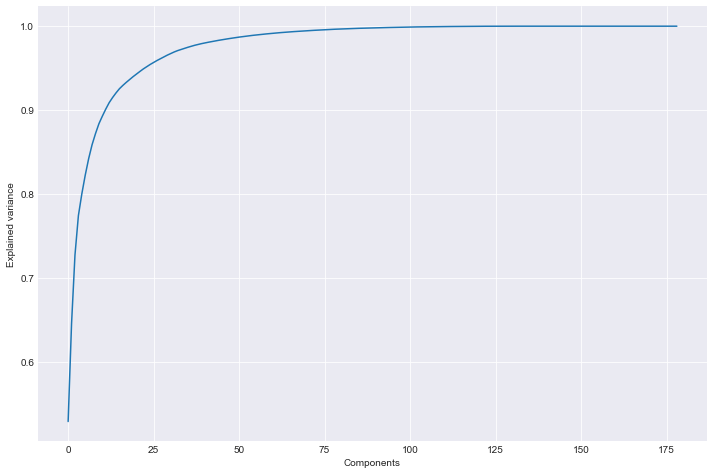

In [79]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Components')
plt.ylabel('Explained variance')
plt.show()

#### Looks like 35 components explains  95% of the variance in the dataset so let us choose 35components for our modeling

In [80]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=35)

In [81]:
X_train_pca = pca_final.fit_transform(X_train_res)
X_train_pca.shape

(38468, 35)

In [82]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.007693228239993732 , min corr:  -0.010813963928437472


#### There does not seem to be corelation

In [83]:
#Applying selected components to the test data - 50 components
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8972, 35)

#### We will train following model to check best model

1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Boosting models - Gradient Boosting Classifier and XGBoost Classifier


### 1. Logistic Regression
Logistic Regression on our principal components

In [84]:
## Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr0 = LogisticRegression(class_weight='balanced')

In [85]:
Model.fit(lr0, X_train_pca, y_train_res)


Model Report
Accuracy : 0.827
Recall/Sensitivity : 0.8416
AUC Score (Train): 0.899919
CV Score : Mean - 0.8990907 | Std - 0.002047831 | Min - 0.896549 | Max - 0.9027478


In [86]:
# predictions on Test data
pred_probs_test = lr0.predict(X_test_pca)
Model.metrics(y_test,pred_probs_test)

Roc_auc_score : 0.8174847950820503
Sensitivity/Recall : 0.8203342618384402
Specificity: 0.8146353283256603
FPR: 0.1853646716743397
Positive predictive value: 0.2779613025011798
Negative Predictive value: 0.981176127243543
sklearn precision score value: 0.2779613025011798


In [87]:
print("Accuracy : {}".format(metrics.accuracy_score(y_test,pred_probs_test)))
print("Recall : {}".format(metrics.recall_score(y_test,pred_probs_test)))
print("Precision : {}".format(metrics.precision_score(y_test,pred_probs_test)))

Accuracy : 0.815091395452519
Recall : 0.8203342618384402
Precision : 0.2779613025011798


In [88]:
#Making prediction on the test data
pred_probs_train = lr0.predict_proba(X_train_pca)[:,1]
print("roc_auc_score(Train) {:2.2}".format(metrics.roc_auc_score(y_train_res, pred_probs_train)))

roc_auc_score(Train) 0.9


In [89]:
cut_off_prob=0.5
y_train_df = Model.predictChurnProb(lr0,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8269730685244879
Sensitivity/Recall : 0.8415826141208277
Specificity: 0.8123635229281481
FPR: 0.18763647707185194
Positive predictive value: 0.8176904425136391
Negative Predictive value: 0.8368144815766924
sklearn precision score value: 0.8176904425136391


,churn,churn_Prob,final_predicted
0,0,0.721787,1
1,0,0.008890,0
2,0,0.124203,0
3,0,0.021996,0
4,0,0.839883,1


#### Plotting the ROC Curve 

* ROC cureve tells the accuray of model , more the areas under the 45 defree line and curve, more accurate is model

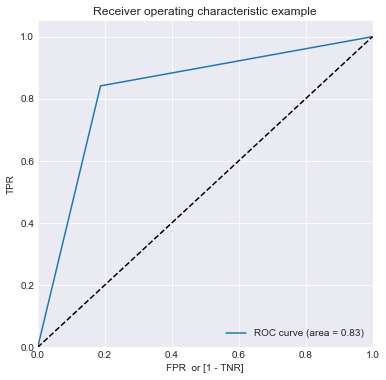

(array([0.        , 0.18763648, 1.        ]),
 array([0.        , 0.84158261, 1.        ]),
 array([2, 1, 0]))

In [90]:
Model.roc(y_train_df.churn, y_train_df.final_predicted)

#### Seems  a good fit.

In [91]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.churn, y_train_df.final_predicted)))

roc_auc_score : 0.83


##### Finding Optimal Cutoff Point

We will try adjusting the probability threshold which shall lead to higher sensitivity or recall rate.



     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.672715  0.980191  0.365239
0.2   0.2  0.742305  0.954508  0.530103
0.3   0.3  0.784808  0.920921  0.648695
0.4   0.4  0.813299  0.886243  0.740356
0.5   0.5  0.826973  0.841583  0.812364
0.6   0.6  0.828429  0.782677  0.874181
0.7   0.7  0.814261  0.713008  0.915514
0.8   0.8  0.773422  0.596340  0.950504
0.9   0.9  0.596626  0.208225  0.985027


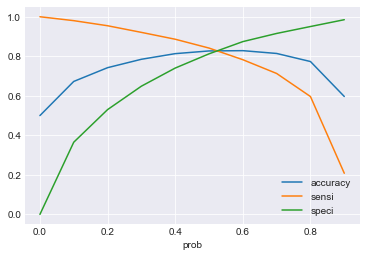

In [92]:
# finding cut-off with the right balance of the metrices
# sensitivity vs specificity trade-off
Model.findOptimalCutoff(y_train_df)

* From the curve above, 0.45 is the optimum point .
* Though, we can take cutoff between 0.4 and 0.6  but to keep the test sensitivity/recall significant we choose 0.45. 

In [93]:
# predicting with the choosen cut-off on train
cut_off_prob = 0.45
Model.predictChurnProb(lr0,X_train_pca,y_train_res,cut_off_prob)

Roc_auc_score : 0.8211500467921389
Sensitivity/Recall : 0.8648227097847562
Specificity: 0.7774773837995217
FPR: 0.2225226162004783
Positive predictive value: 0.7953523955245291
Negative Predictive value: 0.8518856101173522
sklearn precision score value: 0.7953523955245291


,churn,churn_Prob,final_predicted
0,0,0.721787,1
1,0,0.008890,0
2,0,0.124203,0
3,0,0.021996,0
4,0,0.839883,1
...,...,...,...
38463,1,0.835060,1
38464,1,0.880506,1
38465,1,0.737661,1
38466,1,0.875074,1


#### Making prediction on test

In [94]:
# predicting with the choosen cut-off on test
Model.predictChurnProb(lr0,X_test_pca,y_test,cut_off_prob)

Roc_auc_score : 0.8122406085881886
Sensitivity/Recall : 0.8440111420612814
Specificity: 0.7804700751150957
FPR: 0.21952992488490428
Positive predictive value: 0.2506203473945409
Negative Predictive value: 0.9829111992676228
sklearn precision score value: 0.2506203473945409


,churn,churn_Prob,final_predicted
4265,0,0.441387,0
29221,0,0.580571,1
974,0,0.392204,0
1602,0,0.308327,0
10225,0,0.158593,0
...,...,...,...
6262,0,0.203997,0
1424,0,0.042644,0
18308,0,0.265755,0
22978,0,0.106614,0


#### The resulting model, after PCA and logistic regression (with optimal cutoff setting) has a right balance of different metrics score for sensitivity, specificity and Roc Accuracy on the train and test set.

* train sensitivity : 86.47%, train roc auc score : 82.1%
* test sensitivity : 84.40%, test roc auc score : 81.21%

### 2. Decision Tree
 ##### Applying Decision Tree Classifier on our principal components with Hyperparameter tuning

In [95]:
dt0 = DecisionTreeClassifier(class_weight='balanced',
                             max_features='auto',
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=6,
                             random_state=10)
Model.fit(dt0, X_train_pca, y_train_res)


Model Report
Accuracy : 0.7731
Recall/Sensitivity : 0.7231
AUC Score (Train): 0.853100
CV Score : Mean - 0.8409455 | Std - 0.00576417 | Min - 0.8340458 | Max - 0.848101


In [96]:
# make predictions
pred_probs_test = dt0.predict(X_test_pca)
#Let's check the model metrices.
Model.metrics(actual_churn=y_test,pred_churn=pred_probs_test)

Roc_auc_score : 0.7322547420242942
Sensitivity/Recall : 0.6462395543175488
Specificity: 0.8182699297310395
FPR: 0.18173007026896051
Positive predictive value: 0.23625254582484725
Negative Predictive value: 0.963755707762557
sklearn precision score value: 0.23625254582484725


In [97]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(100, 400, 50),
    'min_samples_split': range(100, 400, 100),
    'max_features': [8,10,15]
}
# Create a based model
dt = DecisionTreeClassifier(class_weight='balanced',random_state=10)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 3, n_jobs = 4,verbose = 1,scoring="f1_weighted")

In [98]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train_res)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   20.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   52.8s
[Parallel(n_jobs=4)]: Done 648 out of 648 | elapsed:  1.4min finished


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=10),
             n_jobs=4,
             param_grid={'max_depth': range(5, 15, 3),
                         'max_features': [8, 10, 15],
                         'min_samples_leaf': range(100, 400, 50),
                         'min_samples_split': range(100, 400, 100)},
             scoring='f1_weighted', verbose=1)

In [99]:
# printing the optimal accuracy score and hyperparameters
print('We can get recall of',grid_search.best_score_,'using',grid_search.best_params_)

We can get recall of 0.8104059131101665 using {'max_depth': 14, 'max_features': 15, 'min_samples_leaf': 100, 'min_samples_split': 100}


In [100]:
# model with the best hyperparameters
dt_final = DecisionTreeClassifier(class_weight='balanced',
                             max_depth=14,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=15,
                             random_state=10)


In [101]:
Model.fit(dt_final,X_train_pca,y_train_res)


Model Report
Accuracy : 0.8313
Recall/Sensitivity : 0.8354
AUC Score (Train): 0.916615
CV Score : Mean - 0.8923806 | Std - 0.002435704 | Min - 0.8882258 | Max - 0.8946767


In [102]:
# make predictions
pred_probs_test = dt_final.predict(X_test_pca)
#Let's check the model metrices.
Model.metrics(actual_churn=y_test,pred_churn=pred_probs_test)

Roc_auc_score : 0.7618956420555443
Sensitivity/Recall : 0.7089136490250696
Specificity: 0.8148776350860188
FPR: 0.1851223649139811
Positive predictive value: 0.2498772704958272
Negative Predictive value: 0.9698630136986301
sklearn precision score value: 0.2498772704958272


In [103]:
# classification report
print(classification_report(y_test,pred_probs_test))

              precision    recall  f1-score   support

           0       0.97      0.81      0.89      8254
           1       0.25      0.71      0.37       718

    accuracy                           0.81      8972
   macro avg       0.61      0.76      0.63      8972
weighted avg       0.91      0.81      0.84      8972



#### After hyperparameter tuning  recall rate is 67.54% which is not very significant to predict the churn.

#### Let's see if we can achive a better Recall rate by deciding an optimal cut-off for the model to predict churn.

In [104]:
# predicting churn with default cut-off 0.5
cut_off_prob = 0.5
y_train_df = Model.predictChurnProb(dt_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8313143391910159
Sensitivity/Recall : 0.835395653530207
Specificity: 0.8272330248518249
FPR: 0.1727669751481751
Positive predictive value: 0.8286318395131762
Negative Predictive value: 0.8340409917701945
sklearn precision score value: 0.8286318395131762


,churn,churn_Prob,final_predicted
0,0,0.549669,1
1,0,0.000000,0
2,0,0.578231,1
3,0,0.320000,0
4,0,0.853659,1


     prob  accuracy     sensi     speci
0.0   0.0  0.610481  1.000000  0.220963
0.1   0.1  0.711864  0.991213  0.432515
0.2   0.2  0.783846  0.962306  0.605386
0.3   0.3  0.809166  0.936779  0.681553
0.4   0.4  0.825673  0.899241  0.752106
0.5   0.5  0.831314  0.835396  0.827233
0.6   0.6  0.825361  0.774670  0.876053
0.7   0.7  0.809062  0.708537  0.909587
0.8   0.8  0.762322  0.569356  0.955288
0.9   0.9  0.695149  0.405948  0.984351


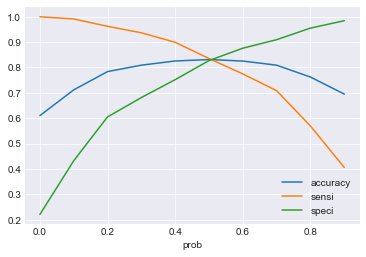

In [105]:
# finding cut-off with the right balance of the metrices
Model.findOptimalCutoff(y_train_df)

#### From the curve above, let'choose 0.58 as the optimum point

In [106]:
# predicting churn with cut-off 0.58
cut_off_prob=0.58
y_train_df = Model.predictChurnProb(dt_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8274149942809608
Sensitivity/Recall : 0.7878236456275346
Specificity: 0.867006342934387
FPR: 0.13299365706561297
Positive predictive value: 0.8555699847552368
Negative Predictive value: 0.8033916269210387
sklearn precision score value: 0.8555699847552368


,churn,churn_Prob,final_predicted
0,0,0.549669,0
1,0,0.000000,0
2,0,0.578231,0
3,0,0.320000,0
4,0,0.853659,1


In [107]:

#Lets see how it performs on test data.
y_test_df= Model.predictChurnProb(dt_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.7437368089617054
Sensitivity/Recall : 0.6309192200557103
Specificity: 0.8565543978677005
FPR: 0.14344560213229948
Positive predictive value: 0.2767257177764203
Negative Predictive value: 0.9638718473074301
sklearn precision score value: 0.2767257177764203


,churn,churn_Prob,final_predicted
4265,0,0.442748,0
29221,0,0.110000,0
974,0,0.497110,0
1602,0,0.619565,1
10225,0,0.529851,0


#### Observation
* Train Recall : 78.78% and Train Roc_auc_score : 82.74
* Test Recall : 63.09% and Test Roc_auc_score : 74.37
* Decision Tree still seems overfitted to the data.

### 3. Random Forest
Applying Random Forest Classifier on our principal components with Hyperparameter tuning

In [139]:
def plot_traintestAcc(score,param):
    scores = score
    # plotting accuracies with max_depth
    plt.figure()
    #plt.plot(scores["param_"+param], 
    #scores["mean_train_score"], 
    #label="training accuracy")
    plt.plot(scores["param_"+param], 
    scores["mean_test_score"], 
    label="test accuracy")
    plt.xlabel(param)
    plt.ylabel("f1")
    plt.legend()
    plt.show()


#### Tuning max_depth

In [132]:
parameters = {'max_depth': range(10, 30, 5)}
rf0 = RandomForestClassifier()
rfgs = GridSearchCV(rf0, parameters, 
                    cv=5, 
                   scoring="f1")
rfgs.fit(X_train_pca,y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(10, 30, 5)}, scoring='f1')

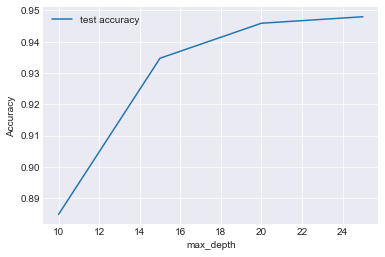

In [135]:
scores = rfgs.cv_results_
#print(scores)
# plotting accuracies with max_depth
plt.figure()  
plt.plot(scores["param_max_depth"].filled(), 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Graph show max dept 20 is best 

In [136]:
parameters = {'n_estimators': range(50, 150, 25)}
rf1 = RandomForestClassifier(max_depth=20,random_state=10)
rfgs1 = GridSearchCV(rf1, parameters, 
                    cv=3, 
                   scoring="recall")

In [137]:
rfgs1.fit(X_train_pca,y_train_res)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=20, random_state=10),
             param_grid={'n_estimators': range(50, 150, 25)}, scoring='recall')

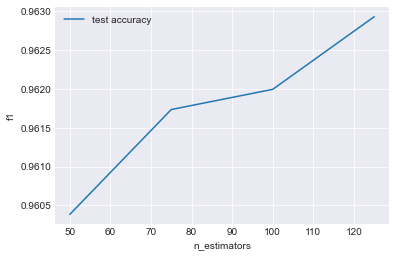

In [140]:
plot_traintestAcc(rfgs1.cv_results_,'n_estimators')

#### Selecting n_estimators = 80

#### Tuning max_features

In [142]:
parameters = {'max_features': [4, 8, 14, 20, 24]}
rf3 = RandomForestClassifier(max_depth=20,n_estimators=80,random_state=10)
rfgs2 = GridSearchCV(rf3, parameters, 
                    cv=5, 
                   scoring="f1")


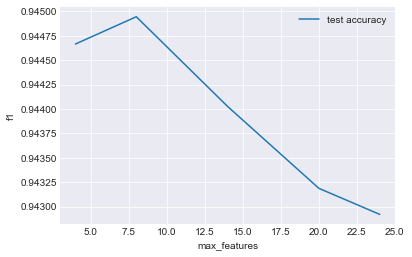

In [143]:
rfgs2.fit(X_train_pca,y_train_res)
plot_traintestAcc(rfgs2.cv_results_,'max_features')

#### Selecting max_features = 5

#### Tuning min_sample_leaf


In [144]:
parameters = {'min_samples_leaf': range(100, 400, 50)}
rf4 = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=5,random_state=10)
rfgs4 = GridSearchCV(rf4, parameters, 
                    cv=3, 
                   scoring="f1")


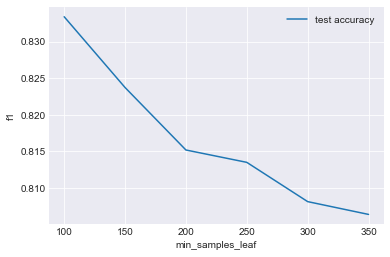

In [145]:
rfgs4.fit(X_train_pca,y_train_res)
plot_traintestAcc(rfgs4.cv_results_,'min_samples_leaf')

#### Selecting min_sample_leaf = 100

##### Tuning min_sample_split

In [146]:
parameters = {'min_samples_split': range(50, 300, 50)}
rf5 = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=5,min_samples_leaf=100,random_state=10)
rfgs5 = GridSearchCV(rf5, parameters, 
                    cv=3, 
                   scoring="f1")

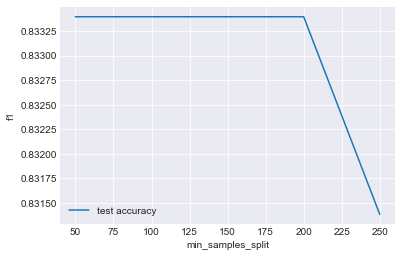

In [147]:
rfgs5.fit(X_train_pca,y_train_res)
plot_traintestAcc(rfgs5.cv_results_,'min_samples_split')

#### Selecting min_sample_split = 150

#### Tunned Random Forest

In [148]:
rf_final = RandomForestClassifier(max_depth=20,
                                  n_estimators=80,
                                  max_features=5,
                                  min_samples_leaf=100,
                                  min_samples_split=50,
                                  random_state=10)

In [149]:
print("Model performance on Train data:")
Model.fit(rf_final,X_train_pca,y_train_res)

Model performance on Train data:

Model Report
Accuracy : 0.8564
Recall/Sensitivity : 0.8541
AUC Score (Train): 0.934817
CV Score : Mean - 0.9181188 | Std - 0.003326212 | Min - 0.9122989 | Max - 0.9211733


In [150]:
# predict on test data
predictions = rf_final.predict(X_test_pca)

In [151]:
print("Model performance on Test data:")
Model.metrics(y_test,predictions)

Model performance on Test data:
Roc_auc_score : 0.7943596858246496
Sensitivity/Recall : 0.7367688022284122
Specificity: 0.8519505694208869
FPR: 0.14804943057911316
Positive predictive value: 0.30211307824100514
Negative Predictive value: 0.9738263398421271
sklearn precision score value: 0.30211307824100514


#### After hyperparameter tuning for the random forest. The Recall rate(Test) is 73.67%.

#### Let's see if we can achive a better Recall rate by deciding an optimal cut-off for the model to predict churn.

In [153]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df = Model.predictChurnProb(rf_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8563741291463035
Sensitivity/Recall : 0.8541125090984715
Specificity: 0.8586357491941354
FPR: 0.14136425080586462
Positive predictive value: 0.8579934193346216
Negative Predictive value: 0.8547694218725739
sklearn precision score value: 0.8579934193346216


,churn,churn_Prob,final_predicted
0,0,0.435130,0
1,0,0.037648,0
2,0,0.273605,0
3,0,0.254885,0
4,0,0.801485,1


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.578793  1.000000  0.157586
0.2   0.2  0.717427  0.994333  0.440522
0.3   0.3  0.805657  0.963710  0.647603
0.4   0.4  0.846288  0.916086  0.776490
0.5   0.5  0.856374  0.854113  0.858636
0.6   0.6  0.843974  0.769783  0.918166
0.7   0.7  0.802667  0.647395  0.957939
0.8   0.8  0.714360  0.444213  0.984507
0.9   0.9  0.580950  0.163669  0.998232


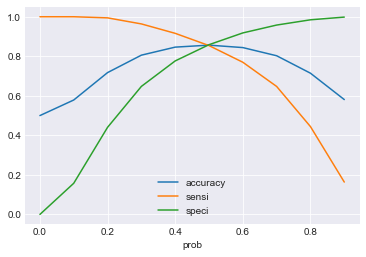

In [154]:
# finding cut-off with the right balance of the metrices
Model.findOptimalCutoff(y_train_df)

#### From the curve above, 0.5 is the optimal point with high enough sensitivity.

In [155]:
cut_off_prob=0.5
Model.predictChurnProb(rf_final,X_train_pca,y_train_res,cut_off_prob)

Roc_auc_score : 0.8563741291463035
Sensitivity/Recall : 0.8541125090984715
Specificity: 0.8586357491941354
FPR: 0.14136425080586462
Positive predictive value: 0.8579934193346216
Negative Predictive value: 0.8547694218725739
sklearn precision score value: 0.8579934193346216


,churn,churn_Prob,final_predicted
0,0,0.435130,0
1,0,0.037648,0
2,0,0.273605,0
3,0,0.254885,0
4,0,0.801485,1
...,...,...,...
38463,1,0.728172,1
38464,1,0.930509,1
38465,1,0.838332,1
38466,1,0.862462,1


#### Making prediction on test

In [156]:
y_test_df= Model.predictChurnProb(rf_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.7943596858246496
Sensitivity/Recall : 0.7367688022284122
Specificity: 0.8519505694208869
FPR: 0.14804943057911316
Positive predictive value: 0.30211307824100514
Negative Predictive value: 0.9738263398421271
sklearn precision score value: 0.30211307824100514


,churn,churn_Prob,final_predicted
4265,0,0.448807,0
29221,0,0.396253,0
974,0,0.615731,1
1602,0,0.374063,0
10225,0,0.207353,0


#### Random Forest after selecting optimal cut-off also is resulting in a model with
* Train Recall : 85.41% and Train Roc_auc_score : 85.63
* Test Recall : 73.67% and Test Roc_auc_score : 79.43



### 4. Boosting models
#### 4.1 Gradiant boosting Classifier
##### Applying Gradiant boosting Classifier on our principal components with Hyperparameter tuning

In [157]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
# Fitting the default GradientBoostingClassifier
gbm0 = GradientBoostingClassifier(random_state=10)
Model.fit(gbm0, X_train_pca, y_train_res)


Model Report
Accuracy : 0.8542
Recall/Sensitivity : 0.8577
AUC Score (Train): 0.926723
CV Score : Mean - 0.9185142 | Std - 0.003072184 | Min - 0.9134114 | Max - 0.9213534


In [158]:
# Hyperparameter tuning for n_estimators
param_test1 = {'n_estimators':range(20,150,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch1.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_depth=8,
                                                  max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  random_state=10,
                                                  subsample=0.8),
             iid=False, n_jobs=4,
             param_grid={'n_estimators': range(20, 150, 10)}, scoring='f1')

In [159]:
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 140}, 0.9037137059375224)

In [160]:
# Hyperparameter tuning for max_depth and min_sample_split
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch2.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_features='sqrt',
                                                  n_estimators=140,
                                                  random_state=10,
                                                  subsample=0.8),
             iid=False, n_jobs=4,
             param_grid={'max_depth': range(5, 16, 2),
                         'min_samples_split': range(200, 1001, 200)},
             scoring='f1')

In [161]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 15, 'min_samples_split': 200}, 0.9448426300426286)

In [162]:
# Hyperparameter tuning for min_sample_leaf
param_test3 = {'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140,max_depth=15,min_samples_split=200, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch3.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_depth=15,
                                                  max_features='sqrt',
                                                  min_samples_split=200,
                                                  n_estimators=140,
                                                  random_state=10,
                                                  subsample=0.8),
             iid=False, n_jobs=4,
             param_grid={'min_samples_leaf': range(30, 71, 10)}, scoring='f1')

In [163]:
gsearch3.best_params_, gsearch3.best_score_

({'min_samples_leaf': 30}, 0.9440014296385755)

In [164]:
# Hyperparameter tuning for max_features
param_test4 = {'max_features':range(7,20,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140,max_depth=15, min_samples_split=200, min_samples_leaf=30, subsample=0.8, random_state=10),
param_grid = param_test4, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch4.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_depth=15,
                                                  min_samples_leaf=30,
                                                  min_samples_split=200,
                                                  n_estimators=140,
                                                  random_state=10,
                                                  subsample=0.8),
             iid=False, n_jobs=4, param_grid={'max_features': range(7, 20, 2)},
             scoring='f1')

In [165]:
gsearch4.best_params_, gsearch4.best_score_

({'max_features': 15}, 0.9469939651089218)

#### Tunned GradientBoostingClassifier

In [166]:
# Tunned GradientBoostingClassifier
gbm_final = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140,max_features=15,max_depth=15, min_samples_split=200, min_samples_leaf=40, subsample=0.8, random_state=10)
Model.fit(gbm_final, X_train_pca, y_train_res)


Model Report
Accuracy : 0.9998
Recall/Sensitivity : 1
AUC Score (Train): 1.000000
CV Score : Mean - 0.9874597 | Std - 0.0007855597 | Min - 0.9863246 | Max - 0.9886346


In [167]:
# predictions on Test data
dtest_predictions = gbm_final.predict(X_test_pca)

In [168]:
# model Performance on test data
Model.metrics(y_test,dtest_predictions)

Roc_auc_score : 0.7602528157192968
Sensitivity/Recall : 0.5821727019498607
Specificity: 0.9383329294887327
FPR: 0.06166707051126726
Positive predictive value: 0.45091693635382957
Negative Predictive value: 0.9627097576134245
sklearn precision score value: 0.45091693635382957


#### Let's see if we can achive a better Recall rate by deciding an optimal cut-off for the model to predict churn.

In [170]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df = Model.predictChurnProb(gbm_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.9997660393053968
Sensitivity/Recall : 1.0
Specificity: 0.9995320786107934
FPR: 0.0004679213892066133
Positive predictive value: 0.9995322974588162
Negative Predictive value: 1.0
sklearn precision score value: 0.9995322974588162


,churn,churn_Prob,final_predicted
0,0,0.018245,0
1,0,0.000443,0
2,0,0.022772,0
3,0,0.020611,0
4,0,0.108338,0


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.966908  1.000000  0.933815
0.2   0.2  0.990382  1.000000  0.980763
0.3   0.3  0.997114  1.000000  0.994229
0.4   0.4  0.999142  1.000000  0.998284
0.5   0.5  0.999766  1.000000  0.999532
0.6   0.6  0.999922  1.000000  0.999844
0.7   0.7  0.999844  0.999688  1.000000
0.8   0.8  0.998778  0.997556  1.000000
0.9   0.9  0.984663  0.969325  1.000000


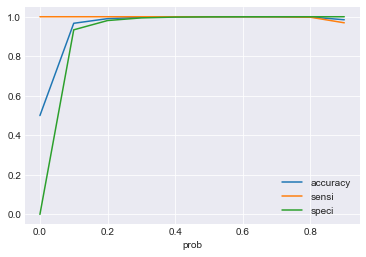

In [171]:
Model.findOptimalCutoff(y_train_df)

In [172]:
cut_off_prob=0.1
Model.predictChurnProb(gbm_final,X_train_pca,y_train_res,cut_off_prob)

Roc_auc_score : 0.966907559529999
Sensitivity/Recall : 1.0
Specificity: 0.9338151190599979
FPR: 0.06618488094000208
Positive predictive value: 0.9379236358316673
Negative Predictive value: 1.0
sklearn precision score value: 0.9379236358316673


,churn,churn_Prob,final_predicted
0,0,0.018245,0
1,0,0.000443,0
2,0,0.022772,0
3,0,0.020611,0
4,0,0.108338,1
...,...,...,...
38463,1,0.990920,1
38464,1,0.971476,1
38465,1,0.975779,1
38466,1,0.990885,1


#### Making prediction on test

In [173]:
y_test_df= Model.predictChurnProb(gbm_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.8150036818478489
Sensitivity/Recall : 0.8064066852367688
Specificity: 0.823600678458929
FPR: 0.176399321541071
Positive predictive value: 0.28452088452088453
Negative Predictive value: 0.9799625198212484
sklearn precision score value: 0.28452088452088453


,churn,churn_Prob,final_predicted
4265,0,0.733939,1
29221,0,0.124172,1
974,0,0.451202,1
1602,0,0.016115,0
10225,0,0.031390,0


#### This model is litrally over-fitting the Training data with a lower performance on the Test data.

#### 4.2 XGBoost Classifier
 
    Applying XGBoost Classifier on our principal components with Hyperparameter tuning

In [178]:
!pip install xgboost
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
# Fitting the XGBClassifier
xgb1 = XGBClassifier(learning_rate =0.1,
                    n_estimators=1000,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective= 'binary:logistic',
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27)

In [179]:
# Model fit and performance on Train data
Model.fit(xgb1, X_train_pca, y_train_res)

[12:48:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:50:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:51:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607

In [180]:
# Hyperparameter tunning for the XGBClassifer
param_test1 = {'max_depth':range(3,10,2),'min_child_weight':range(1,6,2)}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch1.fit(X_train_pca, y_train_res)

[13:05:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=5, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_method=

In [181]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 9, 'min_child_weight': 1}, 0.944621705849816)

In [182]:
# Some more hyperparameter tunning for the XGBClassifer
param_test2 = param_test3 = {'gamma':[i/10.0 for i in range(0,5)]}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=9,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch2.fit(X_train_pca, y_train_res)

[13:12:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=9, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_method=

In [183]:
gsearch2.best_params_, gsearch2.best_score_

({'gamma': 0.1}, 0.945627090944617)

In [184]:
# Final XGBClassifier
xgb2 = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=9,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)

In [185]:
# Fit Train data
Model.fit(xgb2, X_train_pca, y_train_res)

[13:13:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:13:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:13:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:14:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607

In [186]:
# Prediction on Test data
dtest_predictions = xgb2.predict(X_test_pca)

In [187]:
# Model evaluation on Test data
Model.metrics(y_test,dtest_predictions)

Roc_auc_score : 0.7602518032955069
Sensitivity/Recall : 0.5877437325905293
Specificity: 0.9327598740004847
FPR: 0.06724012599951538
Positive predictive value: 0.43193449334698053
Negative Predictive value: 0.9629768605378362
sklearn precision score value: 0.43193449334698053


#### Let's see if we can achive a better Recall rate by deciding an optimal cut-off for the model to predict churn.

In [188]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df = Model.predictChurnProb(xgb2,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.9961006550899448
Sensitivity/Recall : 0.9992721222834564
Specificity: 0.9929291878964334
FPR: 0.007070812103566601
Positive predictive value: 0.9929737549080389
Negative Predictive value: 0.999267475931352
sklearn precision score value: 0.9929737549080389


,churn,churn_Prob,final_predicted
0,0,0.026406,0
1,0,0.000680,0
2,0,0.038645,0
3,0,0.044494,0
4,0,0.427758,0


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.937636  1.000000  0.875273
0.2   0.2  0.974498  1.000000  0.948997
0.3   0.3  0.986950  1.000000  0.973900
0.4   0.4  0.992643  0.999844  0.985442
0.5   0.5  0.996101  0.999272  0.992929
0.6   0.6  0.997400  0.998180  0.996621
0.7   0.7  0.995971  0.993813  0.998128
0.8   0.8  0.989134  0.978788  0.999480
0.9   0.9  0.955314  0.910627  1.000000


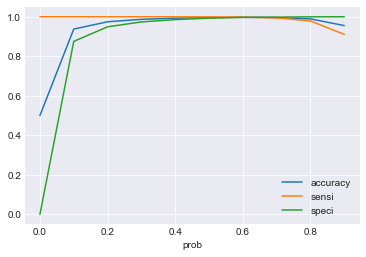

In [189]:
# Finding optimal cut-off probability
Model.findOptimalCutoff(y_train_df)

In [190]:
# Selecting 0.2 as cut-off in an attempt to improve recall rate
cut_off_prob=0.2
Model.predictChurnProb(xgb2,X_train_pca,y_train_res,cut_off_prob)

Roc_auc_score : 0.9744982842882396
Sensitivity/Recall : 1.0
Specificity: 0.9489965685764792
FPR: 0.051003431423520845
Positive predictive value: 0.951471679445956
Negative Predictive value: 1.0
sklearn precision score value: 0.951471679445956


,churn,churn_Prob,final_predicted
0,0,0.026406,0
1,0,0.000680,0
2,0,0.038645,0
3,0,0.044494,0
4,0,0.427758,1
...,...,...,...
38463,1,0.983975,1
38464,1,0.913138,1
38465,1,0.962854,1
38466,1,0.983106,1


#### Making prediction on test

In [192]:
y_test_df= Model.predictChurnProb(xgb2,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.8120119695489922
Sensitivity/Recall : 0.7688022284122563
Specificity: 0.8552217106857282
FPR: 0.14477828931427186
Positive predictive value: 0.31597023468803664
Negative Predictive value: 0.9770242214532872
sklearn precision score value: 0.31597023468803664


,churn,churn_Prob,final_predicted
4265,0,0.614235,1
29221,0,0.146501,0
974,0,0.373935,1
1602,0,0.053881,0
10225,0,0.044364,0



Final Choice of Model
Recall is the most important business metric for the telecom churn problem. The company would like to identify most customers at risk of churning, even if there are many customers that are misclassified as churn. The cost to the company of churning is much higher than having a few false positives.

| Model/Metrics | Train | Test         
| :- |-------------: | :-:
|**Logistic Regression( cut-off = 0.45)**|   | 
| Roc_auc_score | 82.11% | 81.22%|
| Sensitivity/Recall| 86.48% | 84.40% |
| Specificity| 77.74% | 78.04% |
| Precision| 79.53% | 25.04%|
|**DecisionTree ( cut-off = 0.58)**|   | 
| Roc_auc_score | 82.74% | 74.37%|
| Sensitivity/Recall| 78.78% | 63.09% |
| Specificity| 86.70% | 85.65% |
| Precision| 85.55% | 27.67%|
|**Random Forest (cut-off = 0.5)**|   | 
| Roc_auc_score | 85.63% | 79.43%|
| Sensitivity/Recall| 85.41% | 73.67% |
| Specificity| 85.86% | 85.19% |
| Precision| 85.79% | 30.21%|
|**GBC**|   | 
| Roc_auc_score | 96.69% | 85.15%|
| Sensitivity/Recall|100% | 80.640% |
| Specificity| 93.38% | 82.36% |
| Precision| 93.79% | 28.45%|
|**XGB (cut-off = 0.2)**|   | 
| Roc_auc_score | 97.44% | 81.20%|
| Sensitivity/Recall| 100% | 76.88% |
| Specificity| 94.89% | 85.22% |
| Precision| 95.14% | 31.59%



Overall, the Logistic Regression model with probability cut-off = 0.45, performs best. It achieved the best recall accuracy of 84.4% for test data. Also the overall accuracy and specificity is consistent for Test and train data, thus avoiding overfitting. The precision is compromised in this effort but the business objective to predict Churn customers is most accuratety captured by it.



### Identifying relevant churn features.
We will use an instance of Random Forest classifier to identify the features most relevant to churn.

#### Random Forest for churn driver features

In [85]:
rf1 = RandomForestClassifier(max_depth=12,
                            max_features=20,
                            min_samples_leaf=100,
                            min_samples_split=200,
                            n_estimators=300,
                            random_state=10)

In [86]:
rf1.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=12, max_features=20, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=300,
                       random_state=10)

<AxesSubplot:>

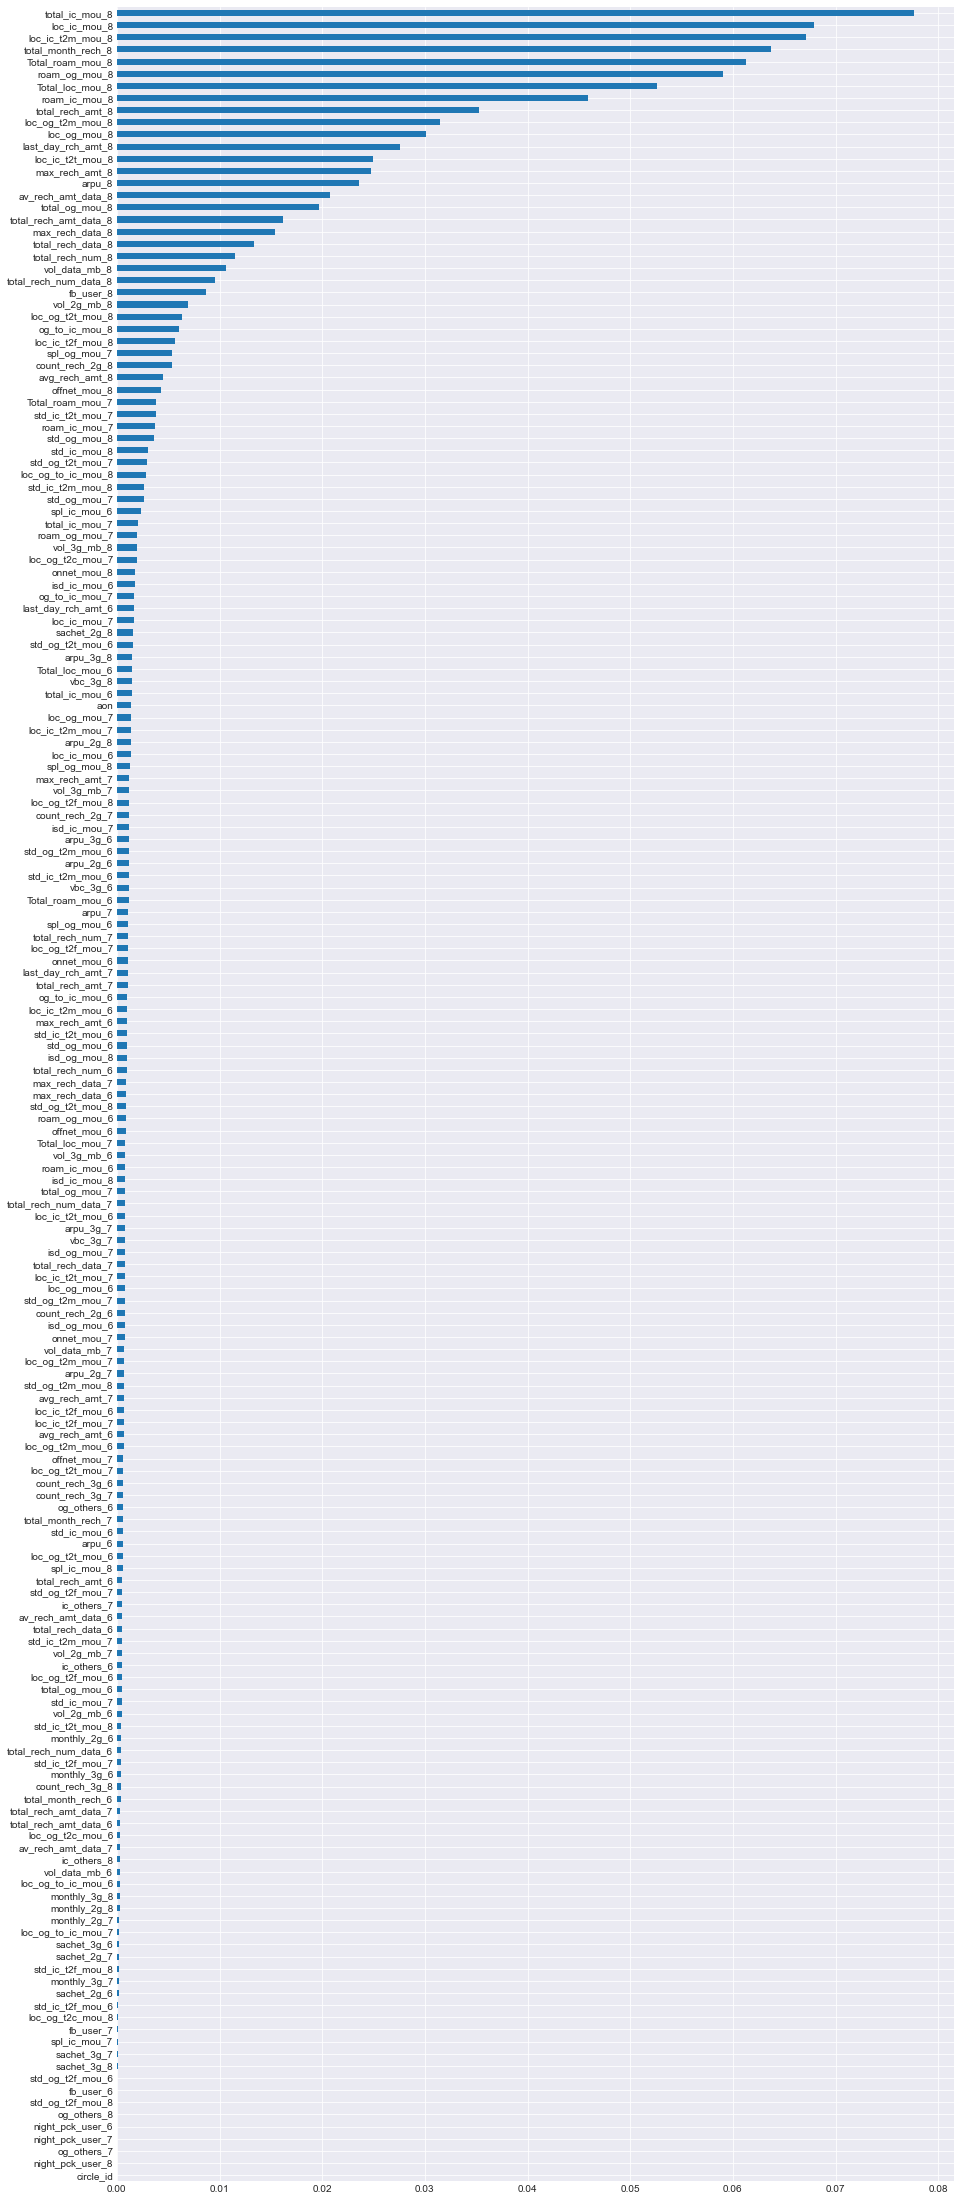

In [102]:
plt.figure(figsize=(15,40))
feat_importances = pd.Series(rf1.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X.columns)).sort_values().plot(kind='barh', align='center',width=.5)

#### Some of the top main predictiors of churn are the monthly KPI features for the action phase (3rd month August).

Graph  suggests that the top 25 features ranked in order of importance as produced by our RandomForest implementation are the features that belong to month 8 i.e., the action month. Hence, it is clear that what happens in the action phase has a direct impact on the customer churn of high value customers. Specifically, these features are as follows:

* total_ic_mou_8 -- Total incoming minutes of usage in month 8
* loc_ic_mou_8 -- local incoming minutes of usage in month 8
* total_month_rech_8 -- Total month recharge amount in month 8
* total_roam_mou_8 -- Total incoming+outgoing roaming minutes of usage in month 8
* loc_ic_t2m_mou_8 -- local incoming calls to another operator minutes of usage in month 8
* roam_og_mou_8 -- outgoing roaming calls minutes of usage in month 8
* Total_loc_mou_8 -- Total local minutes of usage in month 8
* roam_ic_mou_8 -- incoming roaming calls minutes of usage in month 8
* total_rech_amt_8 -- total recharge amount in month 8
* loc_ic_t2t_mou_8 -- local incoming calls from same operator minutes of usage in month 8
* max_rech_amt_8 -- maximum recharge amount in month 8
* last_day_rch_amt_8 -- last (most recent) recharge amount in month 8
* arpu_8 -- average revenue per user in month 8
* loc_og_mou_8 -- local outgoing calls minutes of usage in month 8
* loc_og_t2n_mou_8 -- local outgoing calls minutes of usage to other operator mobile in month 8
* av_rech_amt_data_8 -- average recharge amount for mobile data in month 8
* total_rech_data_8 -- total data recharge (MB) in month 8
* total_og_t2t_mou_8 -- total outgoing calls from same operator minutes of usage in month 8
* total_rech_num_8 -- total number of recharges done in the month 8
* total_rech_amt_data_8 -- total recharge amount for data in month 8
* max_rech_data_8 -- maximum data recharge (MB) in month 8
* avg_rech_amt_8 -- average recharge amount in month 8
* fb_user_8 -- services of Facebook and similar social networking sites for month 8
* vol_data_mb_8 -- volume of data (MB) consumed for month 8
* count_rech_2g_8 -- Number of 2g data recharge in month 8
* loc_og_to_ic_mou_8 -- local outgoing to incoming mou ratio for month of 8
* spl_og_mou_7 -- Special outgoing call for the month of 7

##### Local calls Mou's be it incoming or outgoing have a very important role for churn predictions. Reduction in these KPI's forms a clear indicator of churn.

#####  Overall, drop in any of these indicator KPI is a signal that the customer is not actively engaging in the services offered by the Network operator and thus may choose to churn in the near future.

#####  Next, we will look at some of the stratergic steps which can be taken to retain these predicted churners.

#####  Strategies to manage customer churn
##### It is a fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

#####  For many incumbent operators, retaining high profitable customers is the number one business goal.

* Monitoring Drop in usage
* Customer churn seems to be well predicted by drop in usage.
* Contact these customers proactively to find out what's affecting their experience. Perhaps, offer them coupons or other incentives to continue to use the services, while the company fixes the issues reported.

* Marketing team must come up with campaigns which targets these high-value to-be churner.

* Improving Outgoing services

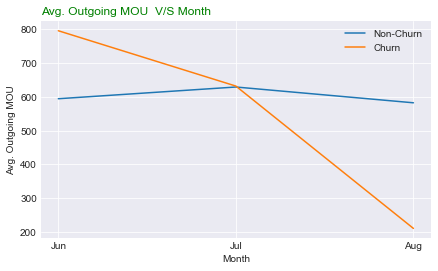

In [91]:
# Outgoing Mou
Plotter.byChurnMou(hv_users,og_col,'Outgoing')

Initially, churner's outgoing usage was more than that of non-churners. Gradually they dropped there outgoing usage. May be these customers din't like the outgoing services offered to them or may be the call tariffs seemed expensive to them or may be the overall call quality, network coverage was not liked my them. This could be further investigated by the network service provider.

### Stratergy suggestions,

* The Network operators must futher investigate their outgoing tariffs, plans and campaigns. Might be that the outgoing tariffs offered to it's customer are less competitive to the outgoing tariffs of their competitor.
* New campaigns which targets the customers with high outgoing usage be rolled out.Like,
* Discounted outgoing rates during particular hours of the day for these customers.
* For every X mou, grant customer with some % of X free mou.
* Investigate and if need be revise the outgoing tarrifs to make it competitive.
* Free monthly outgoing mou's depending on the users past roaming mou usage.
* Improving Roaming services

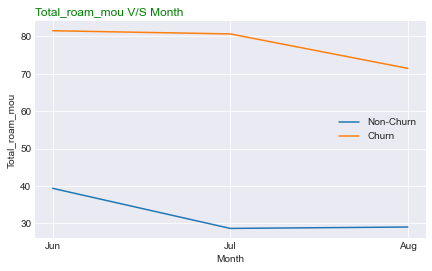

,Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
churn,,,
0,39.360033,28.643301,29.016734
1,81.504156,80.651973,71.443623


In [92]:
Plotter.byChurn(hv_users,'Total_roam_mou')

Stratergy suggestions,

* Churners show higher roaming usage than non-churners.
* The Network operators must futher investigate their roaming tariffs, and quality of service.
* Might be that the roaming tariffs offered are less competitive than their competitor.
* It might be that the customer is not getting good quality of service while roaming. In this case, quality of service guarantees with roaming partners and network quality need to be investigated.
* New campaigns which targets the roaming customers can be rolled out. Like,
* Discounted roaming rates during particular hours of the day.
* Free monthly roaming mou's depending on the users past roaming mou usage.